# _K MEANS CLUSTERING ALGORITHM_

### MODEL REPRESENTATION:
`K-Means` is the simplest and most fundamental clustering algorithm. In general the clustering problem is in escense simple, having data ${x_1,....,x_n}$ we want to partition it into clusters where the goal is to find these clusters only given the data and some modelling assumption.

The model representation for `K-Means` is to learn the clusters such that observations or data points that are in the same cluster are considered similar. We assume that there are `k` clusters underlining our dataset and we're going to introduce a latent variable _`c`_. Then for the $i^{th}$ data point $x_i$ assigned to the cluster `k`, then $c_i$ is going to be equal to `k`, namely variable $c_i$ is going to be an index of what cluster the observation $x_i$ belongs to.

The output of the algorithm are two vectors. A vector **c** of lenght `n`, so if $c_i$ and $c_j$ are both equal to `k`, then the point $x_i$ and $x_j$ are clustered together in cluster `k`. Also, a _K_ mean vectors $\mu$ where each $\mu_i$ is in $R^d$. And each of these $\mu_k$ are going to be called `centroids` which define the center of the cluster.

The goal now is to learn these two sets so, in order to do this we need to define an objective function.

### K-MEANS OBJECTIVE FUNCTION:

K-means objective function can be written as:
$$L = \sum_{i=1}^{n} \sum_{k=1}^{K} \mathbb{1} \big\{ c_i = k \big\} ||x_i - \mu_k||^2$$
- K-means uses the Euclidean distance of $x_i$ to the centroid `k` penalizing the distance of $x_i$ to the centroid it's assigned by $c_i$

The objective function is **non-convex**. This means we can't acctually find the optimal $\mu$ and $c$ so, we can only derive an algorithm for finding a local optimum.

Variables are split into two unknown sets $\mu$ and $c$ that we can't find their best values at the same time to minimize `L`. However fixing $\mu$ we can find the best $c$ and fixing $c$ we can find the best $\mu$. This optimization approach is called coordinate descent: Hold one set of parameters fixed, and optimize the other set. Then switch which set is fixed.



### Euclidean distance:

**Let $x = (x_1,x_2,x_3,...,x_n)$, $j = (j_1,j_2,j_3,...,j_n)$ be points in $R^n$ space, and $D$ the Euclidean distance, then:**
** **
$$D = \sqrt{(x_1 - j_1)^2 + (x_2 - j_2)^2 + (x_3 - j_3)^2 + .... + (x_n - j_n)^2}$$
** **

### K-MEANS ALGORITHM:
- Giving $x_1,. . . .,x_n$ where each $x$ $\in$ $R^d$  
- Minimize $L = \sum_{i=1}^{n} \sum_{k=1}^{K} \mathbb{1} \big\{ c_i = k \big\} ||x_i - \mu_k||^2$  

1- Initialize $\mu$ $=$ $(\mu_1,...,\mu_k)$  
2- Update each $c_i$:  
$$c_i = arg min_k ||x_i - \mu_k||^2$$
3- Update each $\mu_k$:
$$n_k = \sum_{i=1}^{n} \mathbb{1} \big\{ c_i = k \big\} \text{  and  } \mu_k = 1/n_k \sum_{i=1}^{n} x_i \mathbb{1} \big\{ c_i = k \big\}$$
4- Iterate until $c$ and $\mu$ stop changing  


Ok, let's start with the implementation of `K Means Clustering` from scratch. According with the algorithm described above, we need to initialize the `centroids` first. The initial `centroids` designation will be done manually in our example, but there are other ways to do it, for example using the algorithm _`K-Means++`_.

Two main steps have to be implemented for the `K Means Clustering`:

**1.- How to assign each point into a cluster based on the Euclidean distance (_$c_i$ vectors_)**

**2.- Update the cluster centroids using the most updated $c_i$ vectors**


In [1]:
##IMPORTING ALL NECESSARY SUPPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from resources import kmeans_helper as hp

In [2]:
def assign_clusters(x_points, clusters):
    '''
    arguments:
        > x_points: 2-D array type, with the data points
        > clusters: 2-D array type, with the cluster centroids
    returns:
        > 2-D array with a c_i vector that assign each point into a cluster
    '''
    ##DECLARATION: AUXILIARY FUNCTIONS ...
    def point_cluster_dis(centroid):
        def euclidean(point):
            sse = 0.0
            for i in range(len(centroid)):
                sse += (point[i] - centroid[i])**2
                
            return (sse)**0.5
        
        return euclidean
    
    ##THE DISTANCES FOR EACH POINT TO EACH CLUSTER IS CALCULATED ...
    clus_dist = []
    for c in clusters:
        calc_distance = point_cluster_dis(c)
        dist = list(map(calc_distance,x_points))
        clus_dist.append(dist)
    
    ##THE DISTANCES ARE RE-ARRANGED ACCORDING TO EACH POINT ...
    c_vectors = [[x] for x in clus_dist[0]]
    for i in range(1, len(clus_dist)):
        for j in range(len(clus_dist[0])):
            c_vectors[j] += [clus_dist[i][j]]
    
    ##EACH POINT IS ASSIGNED INTO A CLUSTER ...
    pts_assg = c_vectors.copy()
    for i, p in enumerate(c_vectors):
        idx = p.index(min(p))
        for j in range(len(p)):
            if j == idx:
                pts_assg[i][j] = 1
            else:
                pts_assg[i][j] = 0
        
    return pts_assg

In [3]:
def update_clusters(x_points, c_vectors, no_clusters):
    '''
    arguments:
        > x_points: 2-D array type, with the data points
        > c_vectors: 2-D array type, with c_i vectors that assign each point into a cluster
        > no_clusters: integer type, total number of clusters
    returns:
        > 2-D array with updated cluster centroids
    '''
    ##ALL POINTS ARE SEPARATED PER CLUSTER ...
    split_pts_cluster = []
    for c in range(no_clusters):
        pts_in_cluster = [x for x,cv in zip(x_points,c_vectors) if cv[c] == 1]
        split_pts_cluster.append(pts_in_cluster)
        
    ##RE-CALCULATE EACH CLUSTER CENTROID BASED ON THE NUMBER OF POINTS ASSIGNED ...
    new_centroids = []
    for c in range(no_clusters):
        no_pts = len(split_pts_cluster[c])
        sum_x, sum_y = (0,0)
        for j in range(no_pts):
            sum_x += split_pts_cluster[c][j][0]
            sum_y += split_pts_cluster[c][j][1]
            
        new_centroids.append([sum_x/no_pts,sum_y/no_pts])
        
    return new_centroids

In order to verify proper implementation a simple **example** is used to evaluate the functions.
five points are selected and two cluster centroids then both functions are tested. First, the `assign_clusters` function is used to assign each point to the closest centroid. Second, using the $c_i$ vectors the cluster centroids are updated with the `update_clusters` function.

In [4]:
# Example:
points = [[0,1], [2,2], [5,4], [3,6], [4,2]]
clusters = [[0,1],[5,4]]

ci_vectors = assign_clusters(points,clusters)
ci_vectors
# [[1, 0],
# [1, 0],
# [0, 1],
# [0, 1],
# [0, 1]]

[[1, 0], [1, 0], [0, 1], [0, 1], [0, 1]]

In [5]:
new_clusters = update_clusters(points, ci_vectors, 2)
new_clusters
#[[1. , 1.5],
#[4. , 4. ]]

[[1.0, 1.5], [4.0, 4.0]]

## CLUSTERING WITH K-MEANS

Having defined the functions to calculate the cluster assignments and update the centroids, we can now test the clustering functionality.  

In order to execute our functions in an appropiate manner, we need to create a meta-function which combines the "assign" and "update" functions into a coherent clustering algorithm with stopping threshold.

The assignment of initial clusters will be determined by a `K-Means++ Algorithm`, also a `threshold monitor` is used to evaluate that the updated clusters are not changing and stop the main algorithm execution. Both functions are imported from a different module.

In [6]:
def k_means_clustering(x_points, no_clusters=3, max_iter = 100, stop_threshold = .001):
    
    ##K-MEANS ALGORITHM
    ##STEP #01: CLUSTER CENTROIDS INITIALIZATION ...
    clusters = hp.init_clusters(x_points, no_clusters)
    
    for k in range(max_iter):
        ##STEP 02: ASSIGN POINTS TO CENTROIDS ...
        ci_vectors = assign_clusters(x_points, clusters)
        ##STEP 03: UPDATE CENTROIDS ...
        n_clusters = update_clusters(x_points, ci_vectors, no_clusters)
        ##STEP 04: CHECK FOR CONVERGENCE ...
        if hp.threshold_monitor(n_clusters, clusters, stop_threshold):
            break
        else:
            clusters = n_clusters
            
    return n_clusters        


Thru our meta-function `k_means_clustering` we are ready to _"learn"_ the centroids from our dataset.

In [7]:
##LOADING THE DATASET
df = pd.read_csv('.\data\clouds.csv', index_col=0)
df.head(3)

,x,y,cat
0,-1.249017,-1.139365,0
1,-0.545684,-2.350559,0
2,-1.825263,-2.514487,0


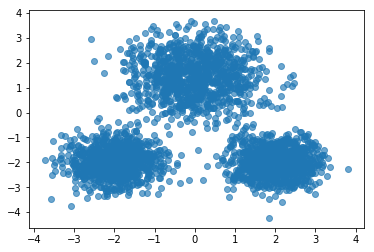

In [8]:
##PLOTTING THE DATA POINTS
plt.scatter(df.x, df.y, alpha = 0.65)
plt.show()

In [9]:
##ESTIMATING CLUSTER CENTROIDS FROM THE DATA
x_points = df.drop(['cat'],axis=1).values
no_clusters = 3
centroids = k_means_clustering(x_points, no_clusters)

To compare the performance of our `K-Means Algorithm` the library `sklearn` is used. The `KMeans` model is imported and the dataset is passed to learn the centroids.

In [10]:
##GET AND INSTANCIATE K-MEANS MODEL
from sklearn.cluster import  KMeans

##ESTIMATE CENTROIDS FROM SKLEARN ...
km = KMeans(n_clusters= no_clusters, n_init=1).fit(x_points)
centroids_sk = km.cluster_centers_

In [11]:
print(centroids)
print(centroids_sk)

[[-1.977387175258162, -1.9703831234467426], [1.995956686047287, -1.973406578095113], [-0.009290047500764873, 1.4924563404333282]]
[[-0.00929005  1.49245634]
 [-1.97738718 -1.97038312]
 [ 1.99595669 -1.97340658]]


The next graph shows the data points and the centroids calculated by both algorithms.
- In red, the centroids calculated thru our customize `k-means Algorithm`
- In black, the centroids calculated thru Sklearn `KMeans Algorithm`


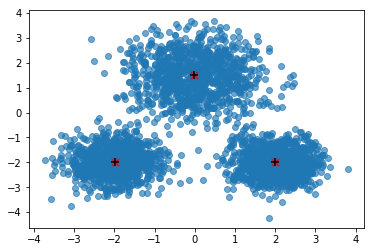

In [12]:
##PLOTTING CLUSTER CENTROIDS ...
centroids_cst = np.array(centroids)
plt.scatter(df.x, df.y, alpha = 0.65)
plt.scatter(centroids_cst[:,0], centroids_cst[:,1], c = 'r', marker = 'x', s = 50)
plt.scatter(centroids_sk[:,0], centroids_sk[:,1], c = 'k', marker = '+', s = 50)
plt.show()